In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "Sleep_Quality_Data.xlsx"
df = pd.read_excel(data_path)

In [2]:
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))  # Split time into hours and minutes
    return hours * 60 + minutes  # Convert to minutes

# Apply the conversion to the 'Bedtime' column
df['Bedtime_num'] = df['Bedtime'].apply(time_to_minutes)
df['WakeUpTime_num'] = df['Wake-up Time'].apply(time_to_minutes)

print(df)


         Date  Screen Time (minutes)  Stress Level (1-10)  \
0  2024-10-08                    235                    8   
1  2024-10-09                    205                    6   
2  2024-10-10                    164                    7   
3  2024-10-11                    165                    7   
4  2024-10-12                    152                   10   
..        ...                    ...                  ...   
85 2025-01-01                    150                    8   
86 2025-01-02                    231                    9   
87 2025-01-03                    184                   10   
88 2025-01-04                    188                    8   
89 2025-01-05                    200                    8   

    Daily Calorie Intake (kcal)  Smoking (cigarettes)  \
0                          3218                    28   
1                          2765                    22   
2                          1705                    22   
3                          2820        

In [5]:
# Explore and clean data
def explore_and_clean_data(df):
    print("\n--- Dataset Overview ---")
    print(df.info())
    print("\n--- Summary Statistics ---")
    print(df.describe())

    # Check for missing values
    if df.isnull().sum().any():
        print("\n--- Missing Values ---")
        print(df.isnull().sum())
        df = df.dropna()
        print("Missing values removed.\n")

    return df

df = explore_and_clean_data(df)


--- Dataset Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            90 non-null     datetime64[ns]
 1   Screen Time (minutes)           90 non-null     int64         
 2   Stress Level (1-10)             90 non-null     int64         
 3   Daily Calorie Intake (kcal)     90 non-null     int64         
 4   Smoking (cigarettes)            90 non-null     int64         
 5   Physical Activity (minutes)     90 non-null     int64         
 6   Eating Habits                   90 non-null     int64         
 7   Caffeine Consumption (mg)       90 non-null     int64         
 8   Bedtime                         90 non-null     object        
 9   Wake-up Time                    90 non-null     object        
 10  Total Hours Slept               90 non-null     fl

In [7]:
def ensure_numeric(df, columns, verbose=False):
    if not isinstance(columns, list):
        raise ValueError("The 'columns' parameter must be a list of column names.")

    for col in columns:
        if col in df.columns:
            if verbose:
                print(f"Converting column '{col}' to numeric.")
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, invalid parsing will be set to NaN
            if verbose:
                print(f"Column '{col}' after conversion:\n{df[col].head()}")
        else:
            if verbose:
                print(f"Warning: Column '{col}' not found in DataFrame.")
    return df

# Example usage (make sure numeric_columns is a list)
numeric_columns = ['Screen Time (minutes)', 'Stress Level (1-10)', 'Daily Calorie Intake (kcal)',
                   'Smoking (cigarettes)', 'Physical Activity (minutes)', 'Caffeine Consumption (mg)']

# Assuming 'df' is your DataFrame
df = ensure_numeric(df, numeric_columns, verbose=True)

Converting column 'Screen Time (minutes)' to numeric.
Column 'Screen Time (minutes)' after conversion:
0    235
1    205
2    164
3    165
4    152
Name: Screen Time (minutes), dtype: int64
Converting column 'Stress Level (1-10)' to numeric.
Column 'Stress Level (1-10)' after conversion:
0     8
1     6
2     7
3     7
4    10
Name: Stress Level (1-10), dtype: int64
Converting column 'Daily Calorie Intake (kcal)' to numeric.
Column 'Daily Calorie Intake (kcal)' after conversion:
0    3218
1    2765
2    1705
3    2820
4    1720
Name: Daily Calorie Intake (kcal), dtype: int64
Converting column 'Smoking (cigarettes)' to numeric.
Column 'Smoking (cigarettes)' after conversion:
0    28
1    22
2    22
3    25
4    40
Name: Smoking (cigarettes), dtype: int64
Converting column 'Physical Activity (minutes)' to numeric.
Column 'Physical Activity (minutes)' after conversion:
0    111
1    109
2     39
3     42
4    106
Name: Physical Activity (minutes), dtype: int64
Converting column 'Caffeine 

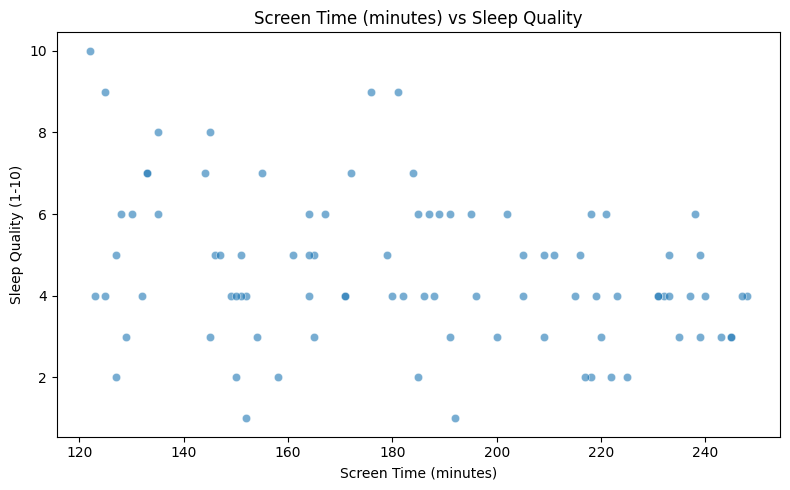

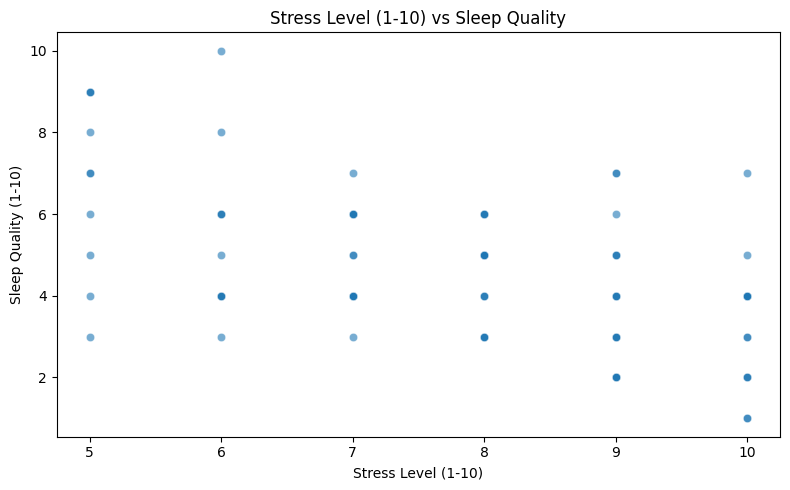

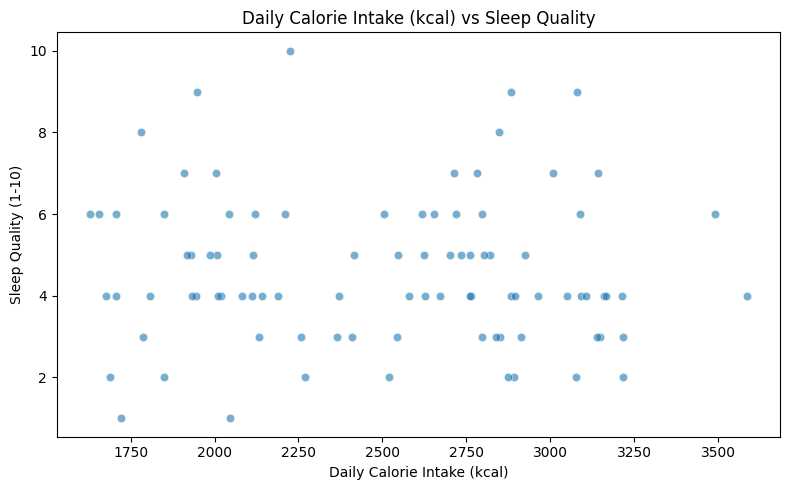

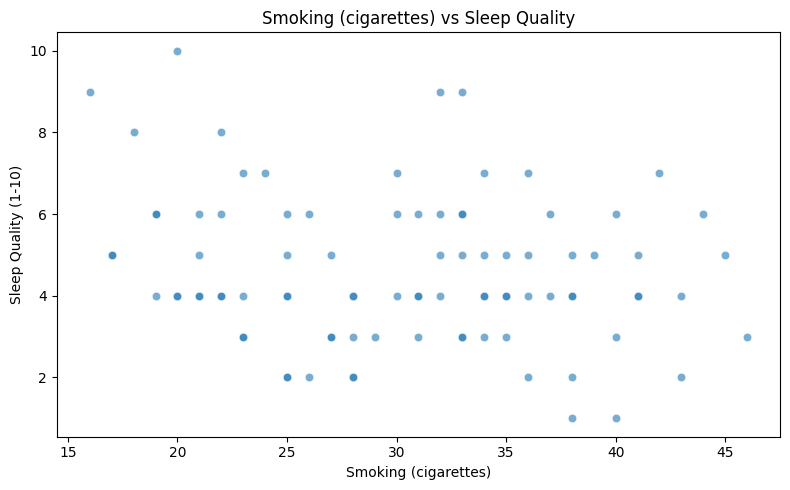

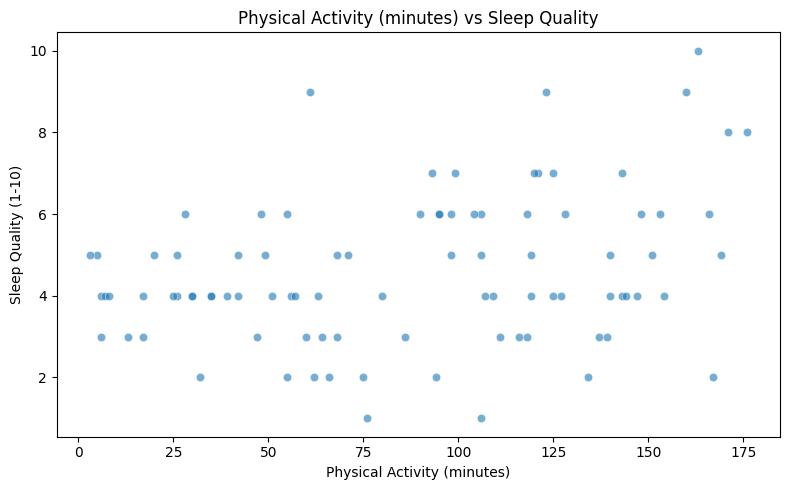

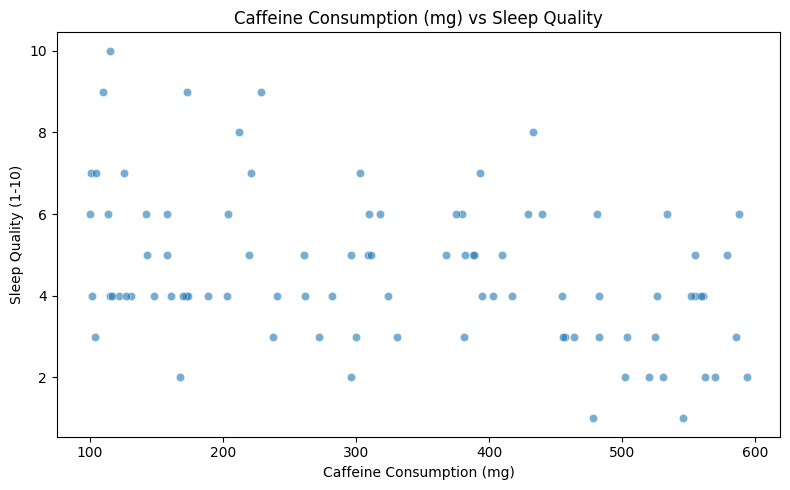

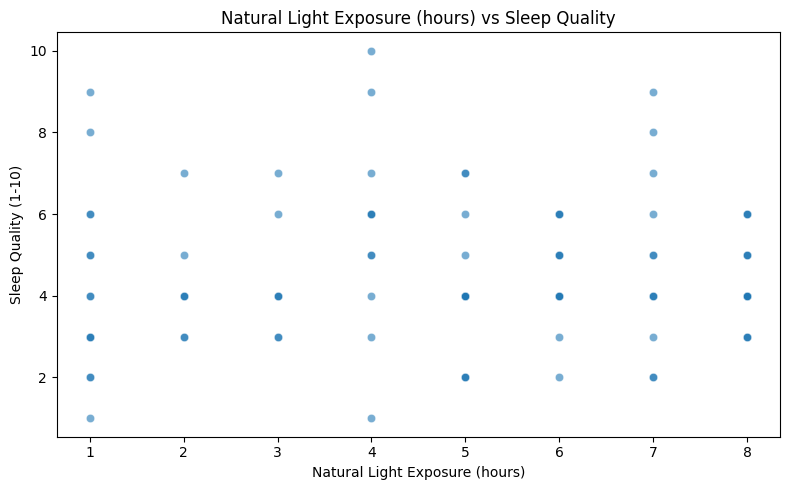

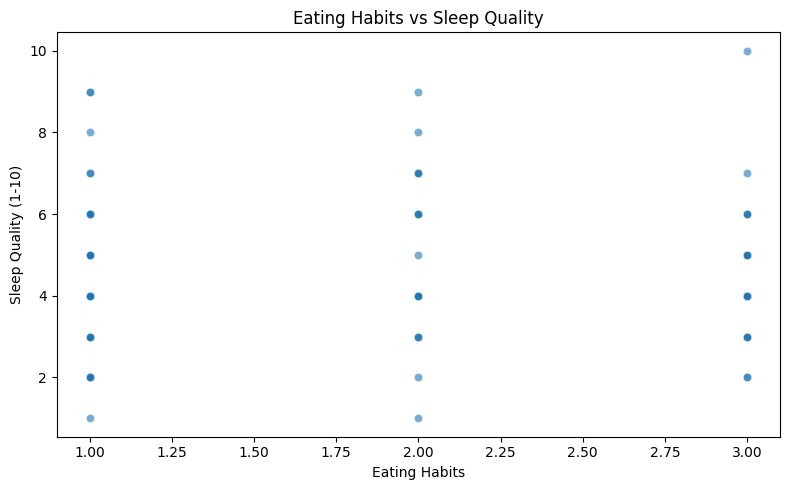

In [8]:
# Scatter Plots: Relationships between variables and sleep quality
def scatter_plots(df):
    factors = [
        "Screen Time (minutes)", "Stress Level (1-10)", "Daily Calorie Intake (kcal)",
        "Smoking (cigarettes)", "Physical Activity (minutes)", "Caffeine Consumption (mg)",
        "Natural Light Exposure (hours)", "Eating Habits"
    ]

    for factor in factors:
        if factor in df.columns and not df[factor].isnull().all():
            valid_data = df.dropna(subset=[factor, "Sleep Quality (1-10)"])
            if not valid_data.empty:
                plt.figure(figsize=(8, 5))
                sns.scatterplot(x=factor, y="Sleep Quality (1-10)", data=valid_data, alpha=0.6)
                plt.title(f"{factor} vs Sleep Quality")
                plt.xlabel(factor)
                plt.ylabel("Sleep Quality (1-10)")
                plt.tight_layout()
                plt.savefig(f"scatter_{factor.replace(' ', '_').lower()}.png", dpi=300)
                plt.show()
            else:
                print(f"No valid data for {factor} vs Sleep Quality. Skipping plot.")

scatter_plots(df)

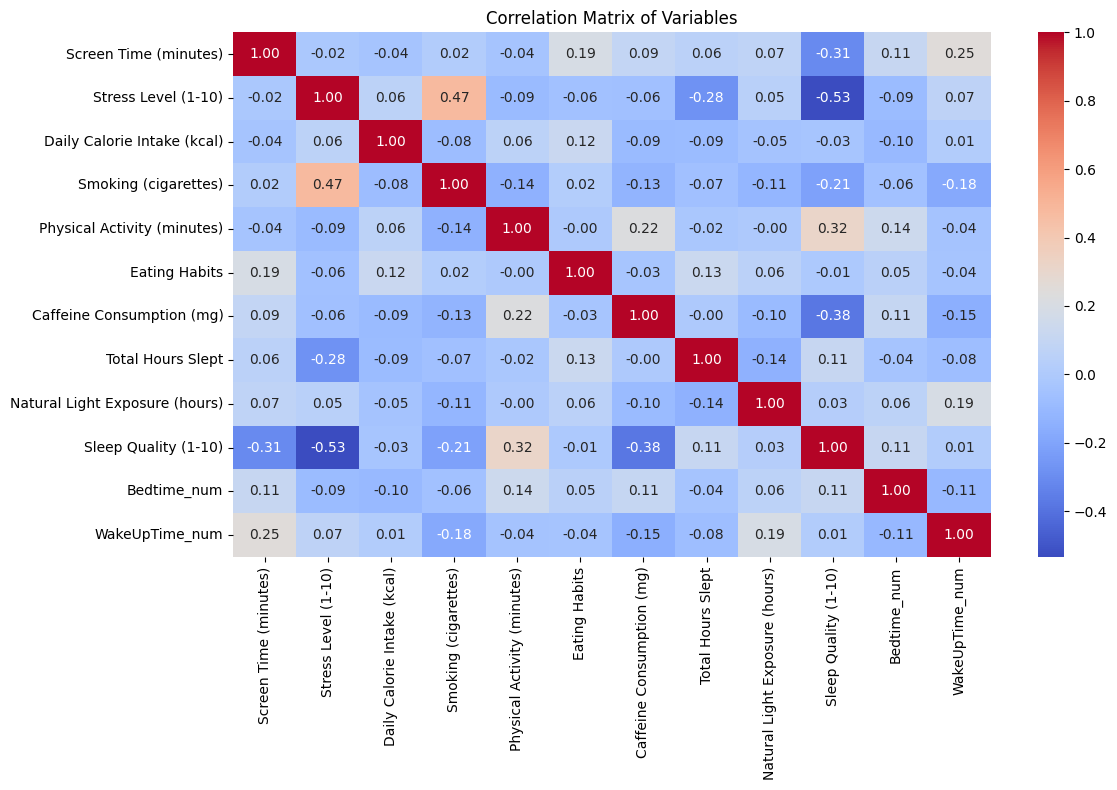

In [11]:
# Heatmap: Correlation matrix of all variables
def heatmap_correlation(df):
    numeric_df = df.select_dtypes(include=['number'])
    correlation_matrix = numeric_df.corr()
    if not correlation_matrix.empty:
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Matrix of Variables")
        plt.tight_layout()
        plt.savefig("heatmap_correlation.png", dpi=300)
        plt.show()
    else:
        print("Correlation matrix is empty. Skipping heatmap.")

heatmap_correlation(df)

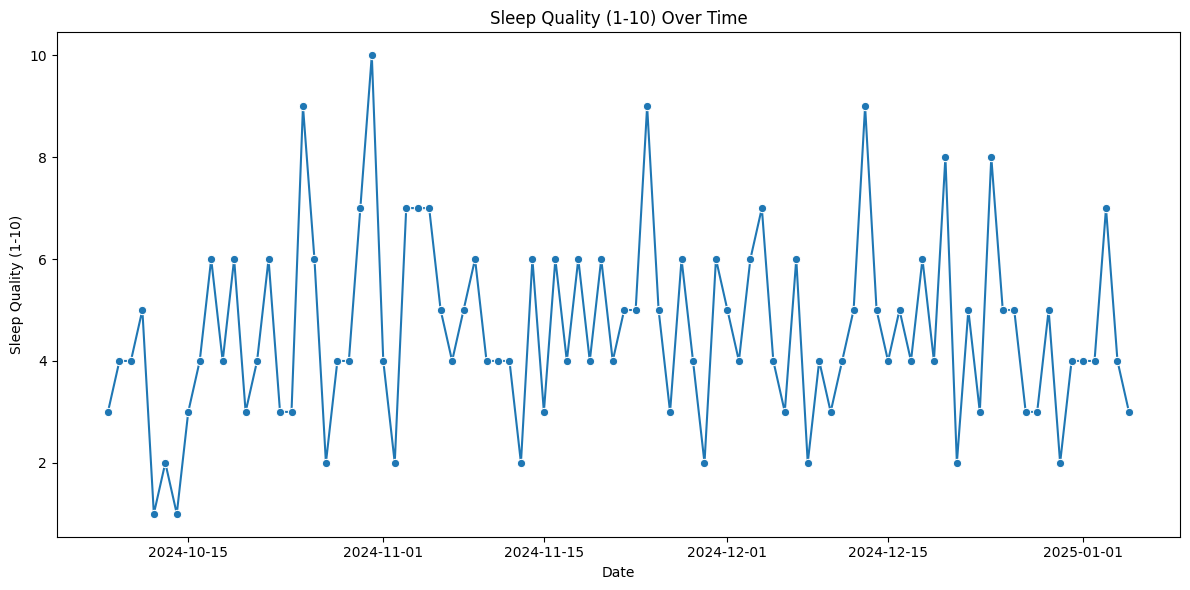

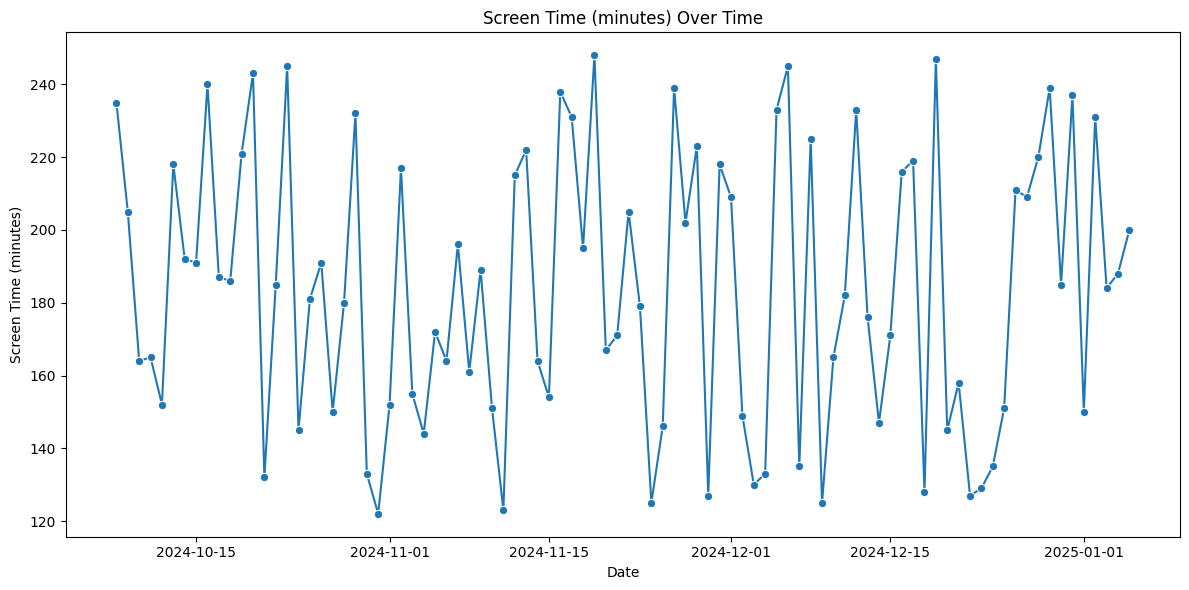

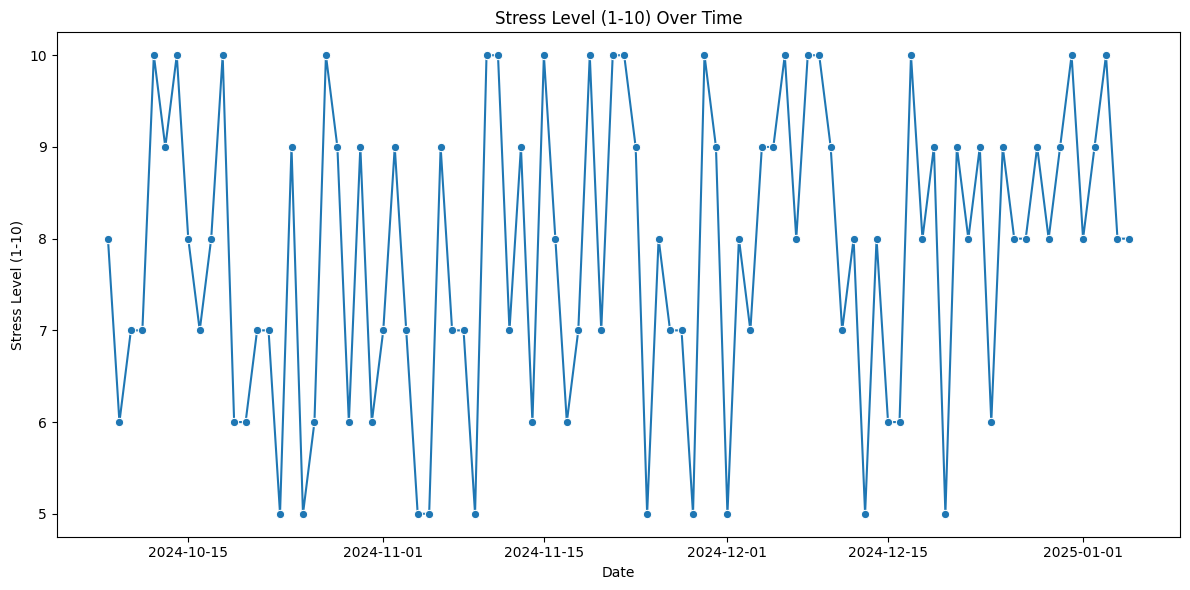

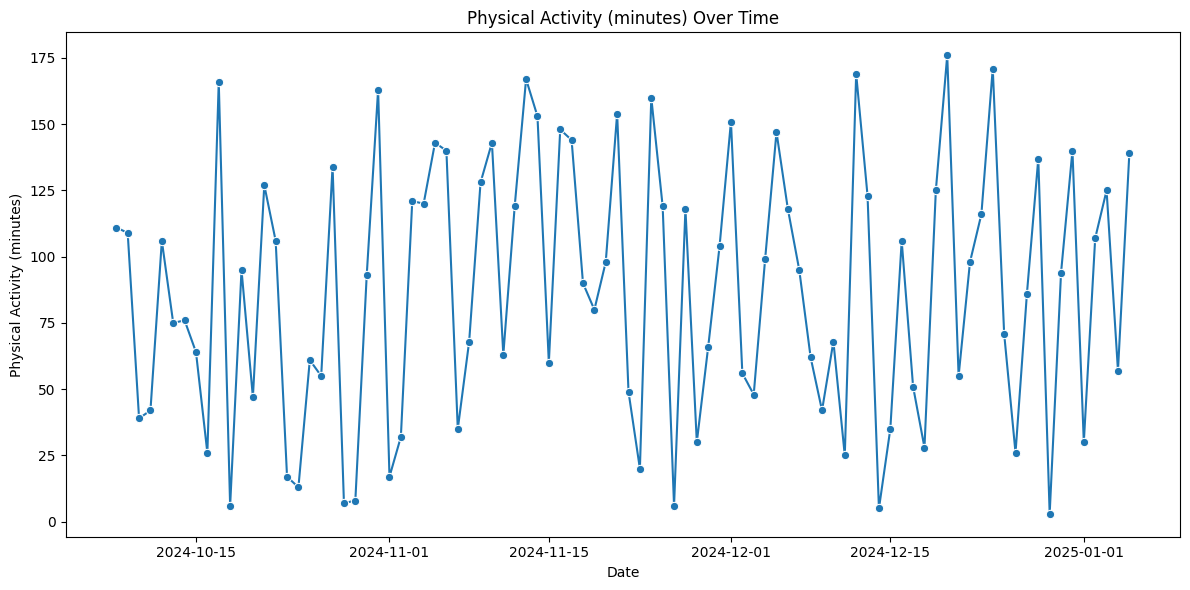

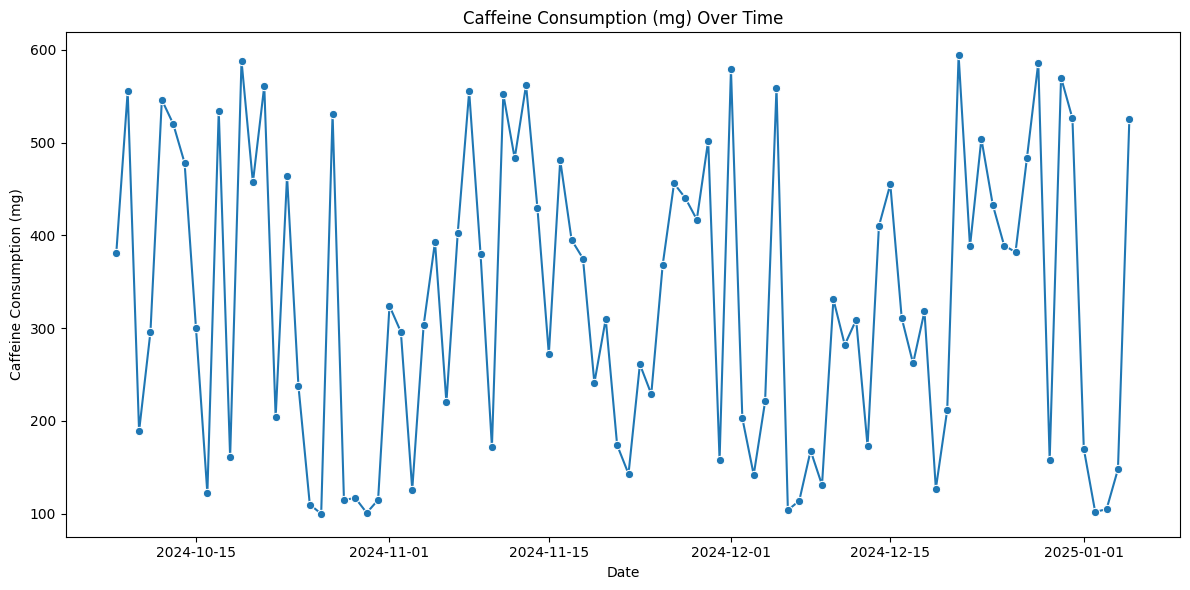

In [12]:
# Time Series Plots: Changes in sleep quality and habits over time
def time_series_plots(df):
    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
        df = df.dropna(subset=["Date"]).sort_values("Date")

        time_series_factors = [
            "Sleep Quality (1-10)", "Screen Time (minutes)", "Stress Level (1-10)",
            "Physical Activity (minutes)", "Caffeine Consumption (mg)"
        ]

        for factor in time_series_factors:
            if factor in df.columns and not df[factor].isnull().all():
                plt.figure(figsize=(12, 6))
                sns.lineplot(x="Date", y=factor, data=df, marker="o")
                plt.title(f"{factor} Over Time")
                plt.xlabel("Date")
                plt.ylabel(factor)
                plt.tight_layout()
                plt.savefig(f"time_series_{factor.replace(' ', '_').lower()}.png", dpi=300)
                plt.show()
            else:
                print(f"No valid data for {factor} over time. Skipping plot.")

time_series_plots(df)

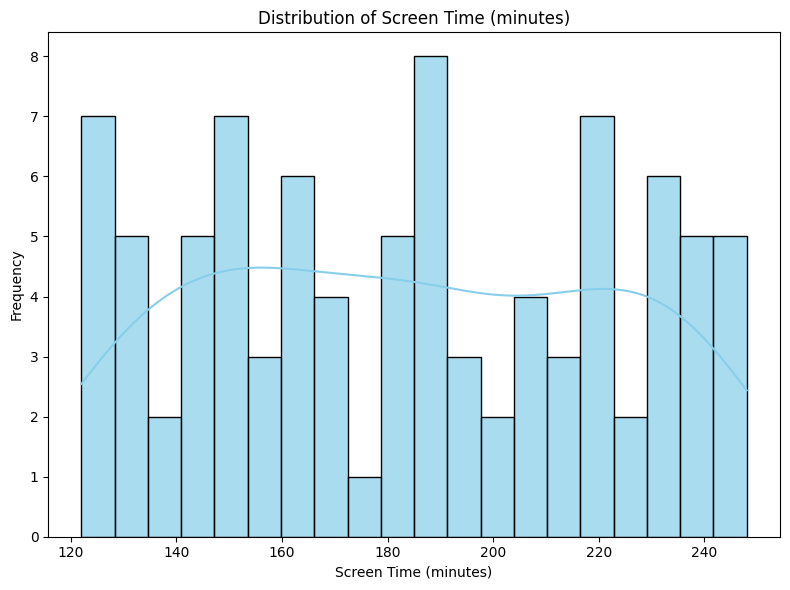

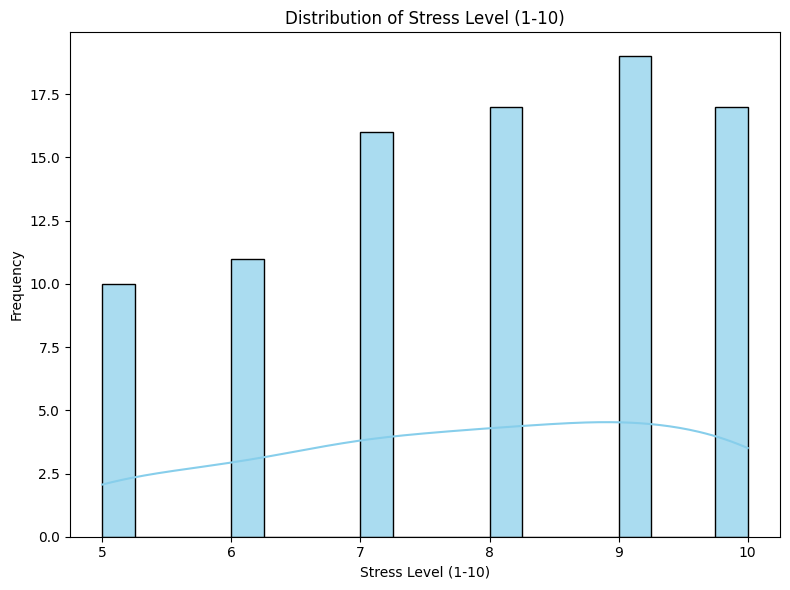

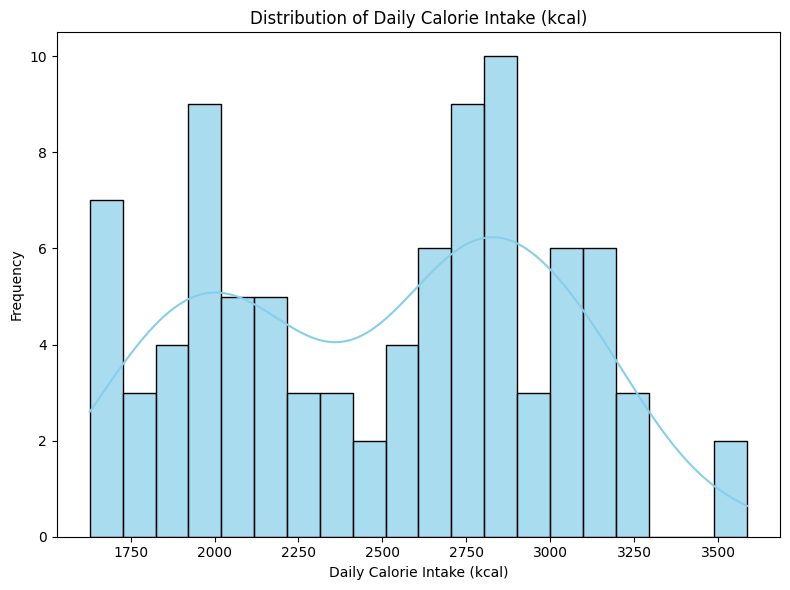

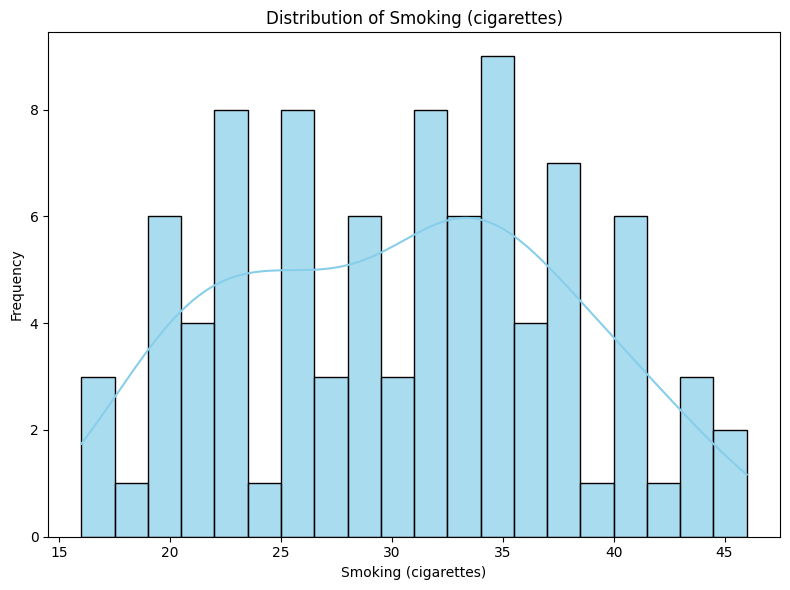

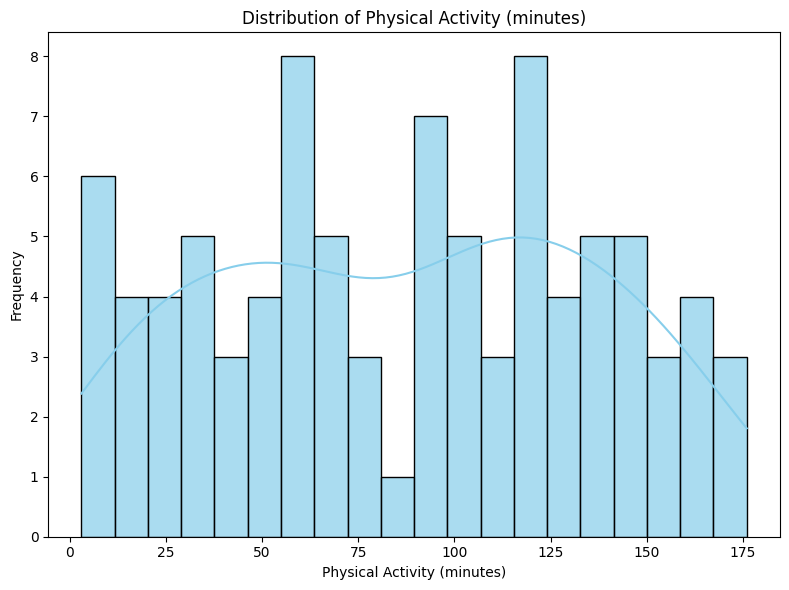

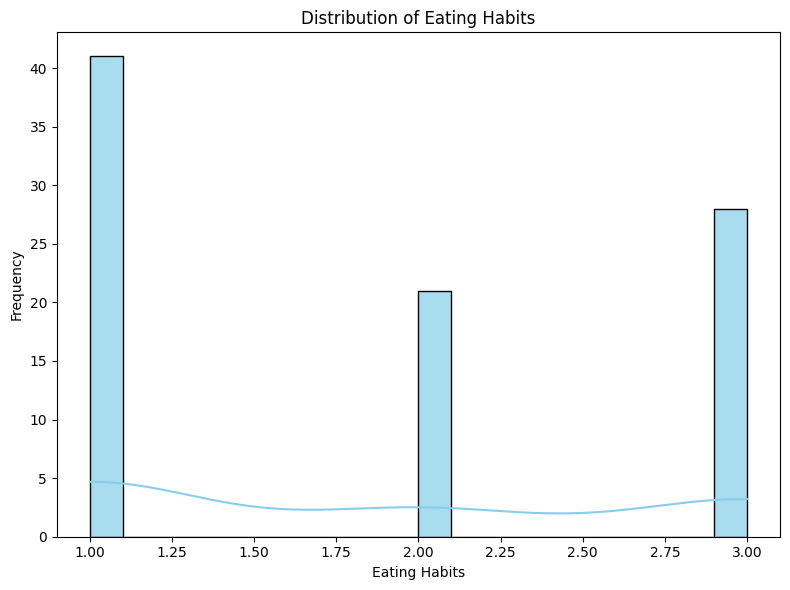

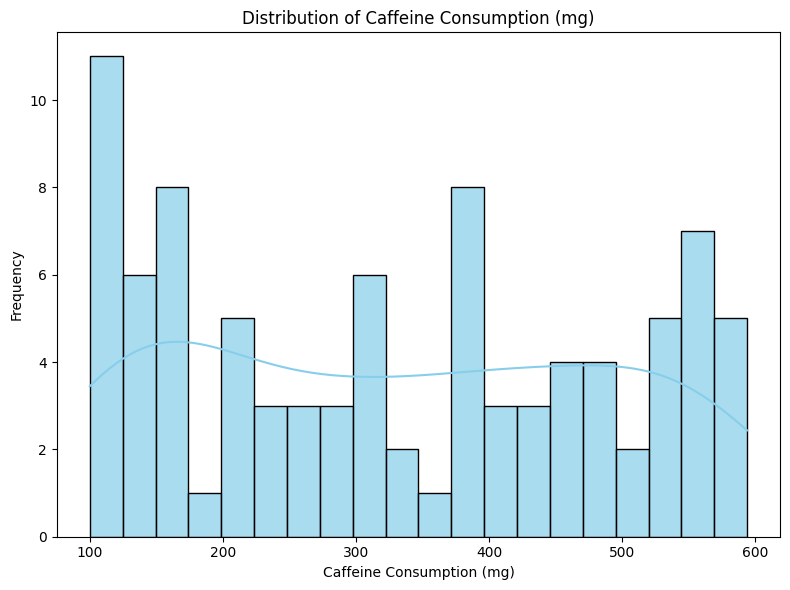

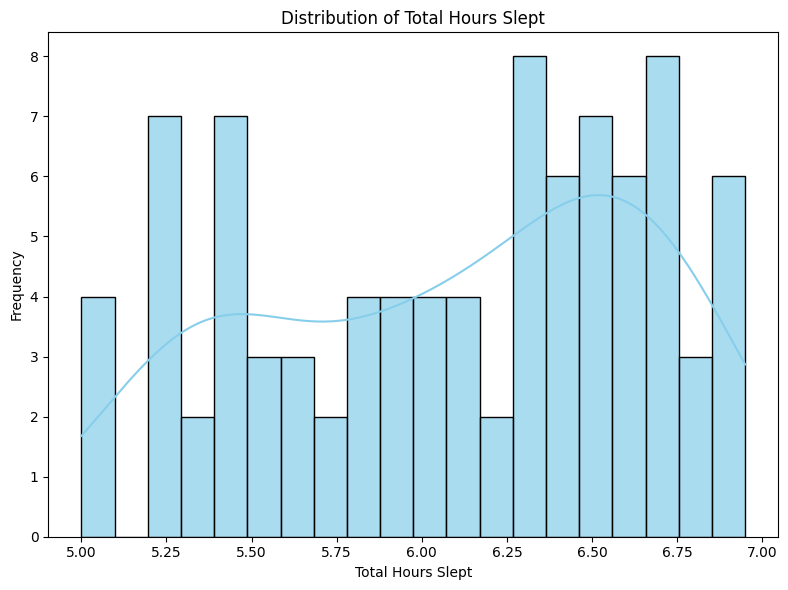

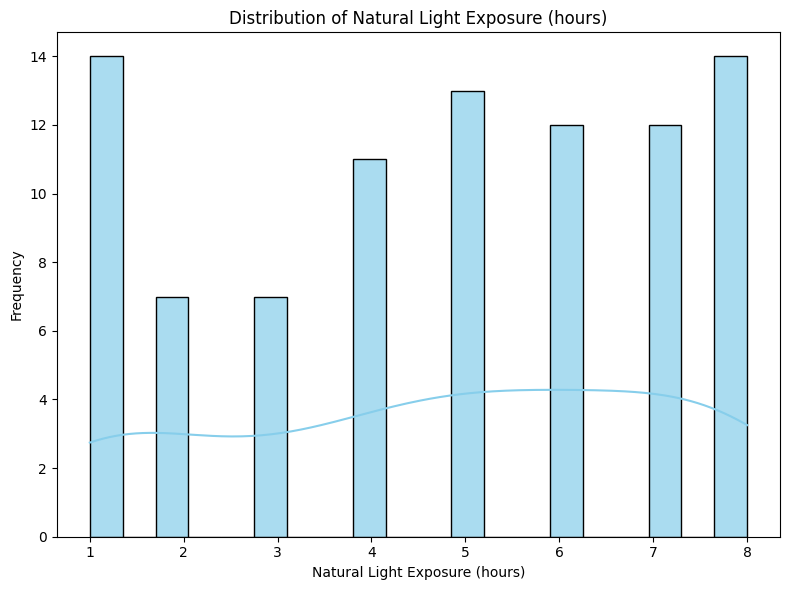

<ipython-input-13-0deab75cee32>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette="Set2")


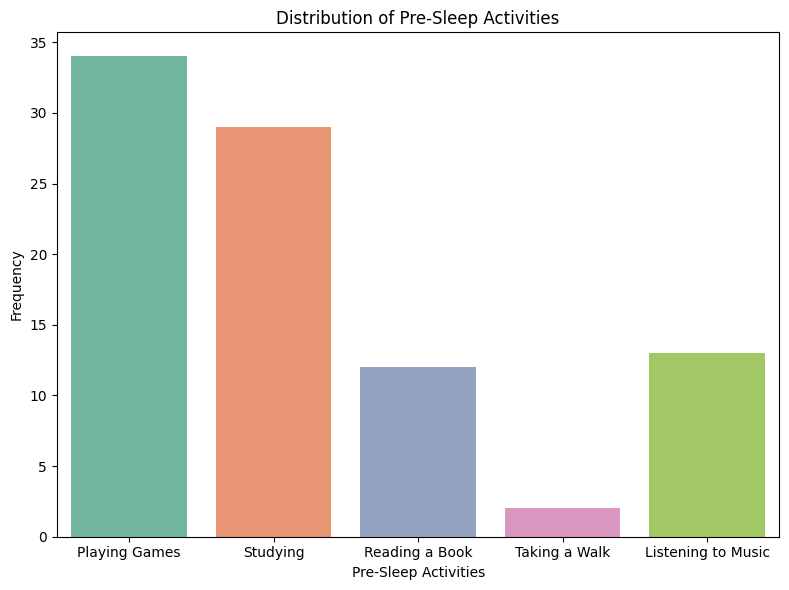

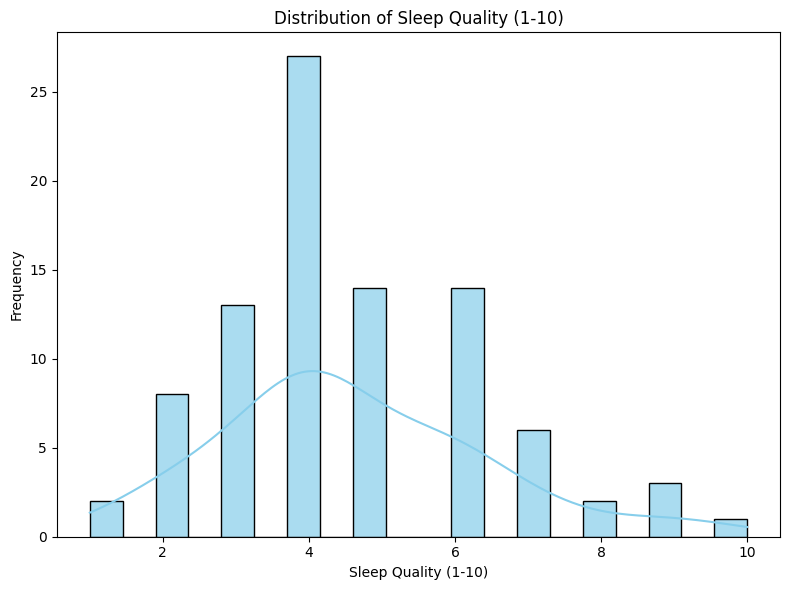

In [13]:
def plot_column_distributions(df):
    columns_to_plot = ['Screen Time (minutes)', 'Stress Level (1-10)',
        'Daily Calorie Intake (kcal)', 'Smoking (cigarettes)',
        'Physical Activity (minutes)', 'Eating Habits',
        'Caffeine Consumption (mg)',
        'Total Hours Slept', 'Natural Light Exposure (hours)',
        'Pre-Sleep Activities', 'Sleep Quality (1-10)'
    ]

    for column in columns_to_plot:
        plt.figure(figsize=(8, 6))

        # Check if the column contains numeric or categorical data
        if df[column].dtype in ['int64', 'float64']:
            # Plot histogram for numerical columns
            sns.histplot(df[column], kde=True, bins=20, color='skyblue', alpha=0.7)
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
        else:
            # Plot count plot for categorical columns
            sns.countplot(x=df[column], palette="Set2")
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')

        # Save and display the plot
        plt.tight_layout()
        plt.savefig(f'distribution_{column.replace(" ", "_").lower()}.png', dpi=300)
        plt.show()
        plt.close()

# Example usage
plot_column_distributions(df)

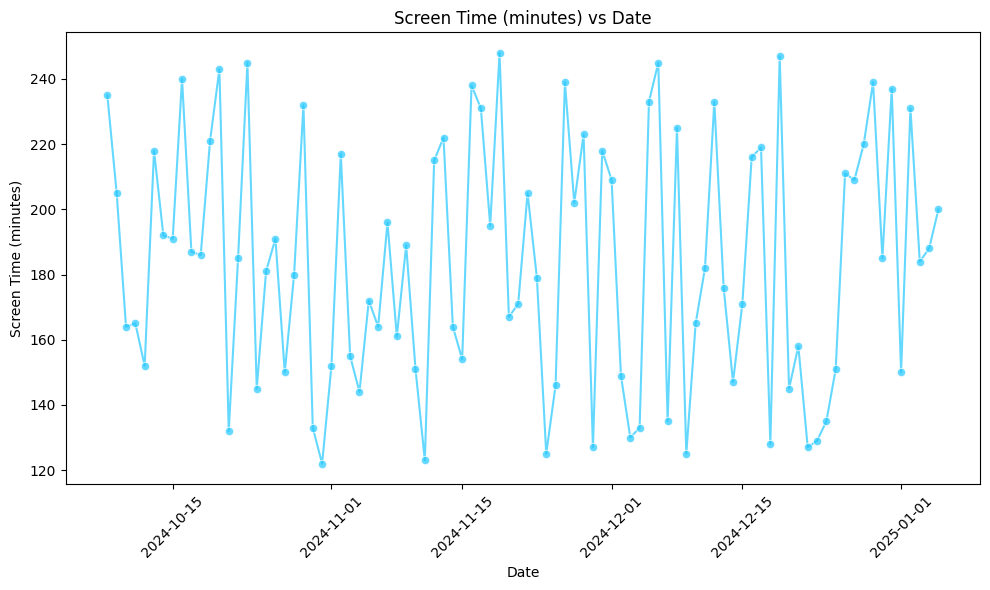

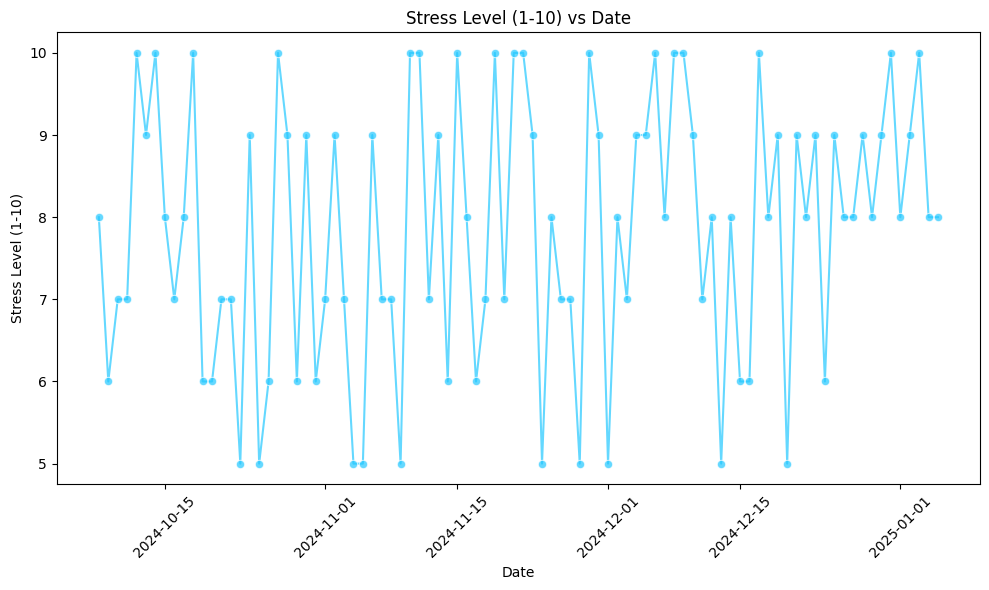

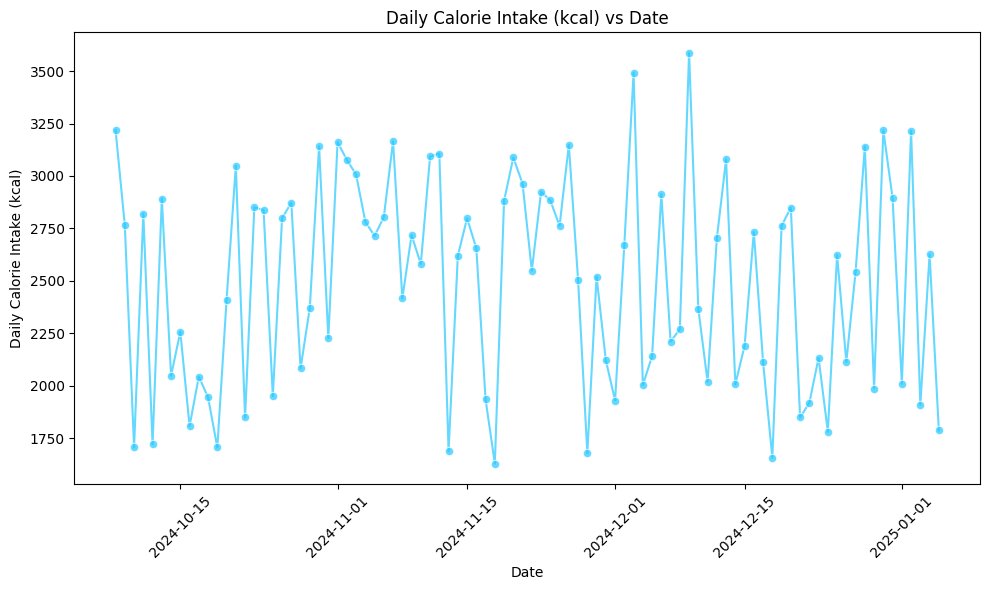

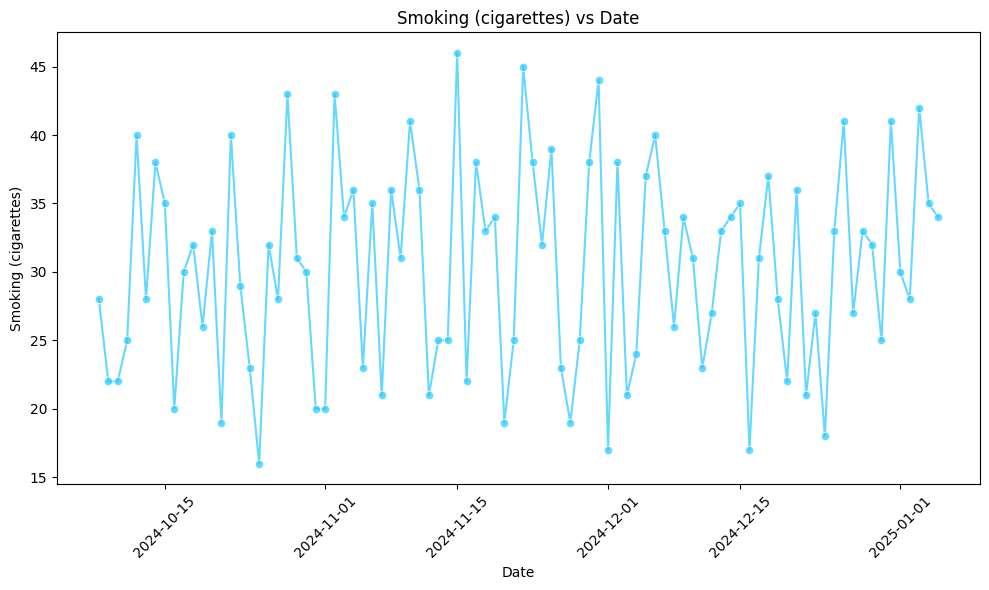

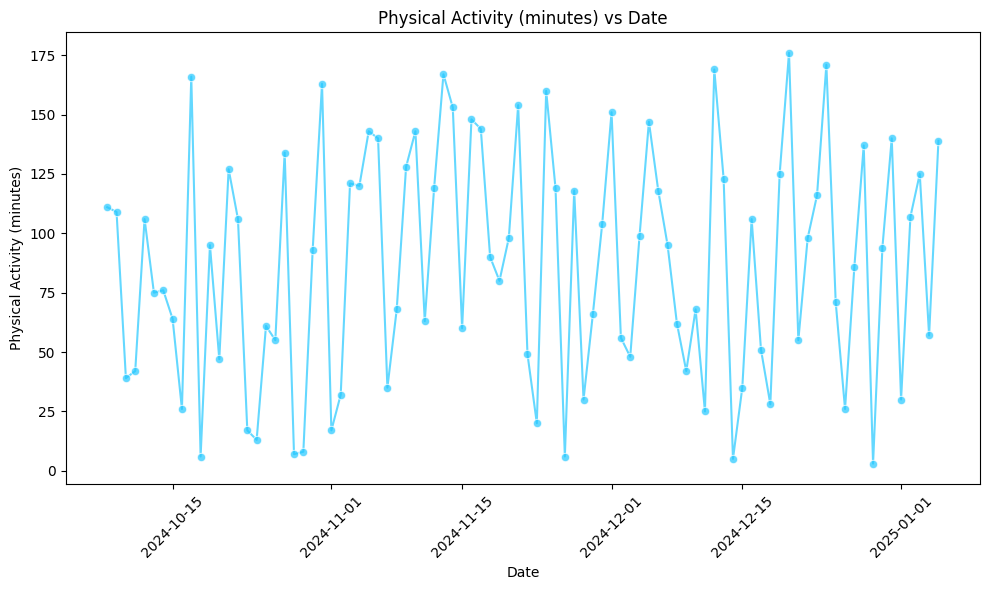

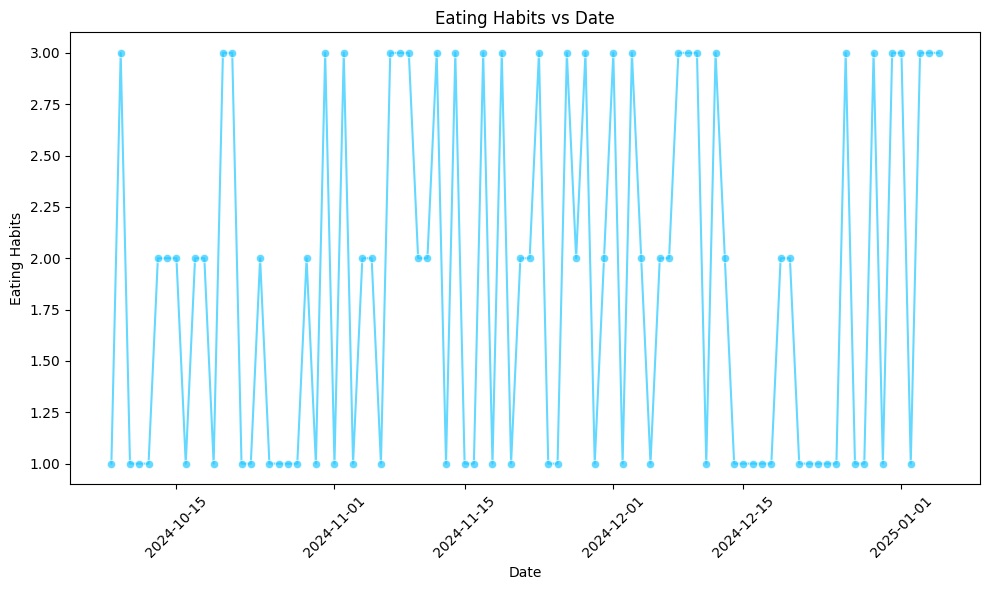

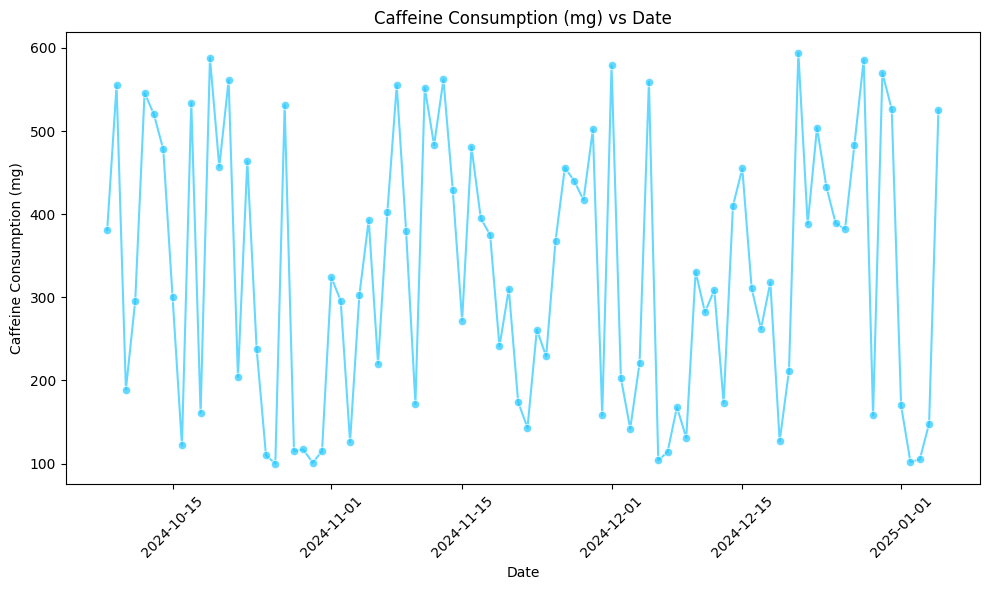

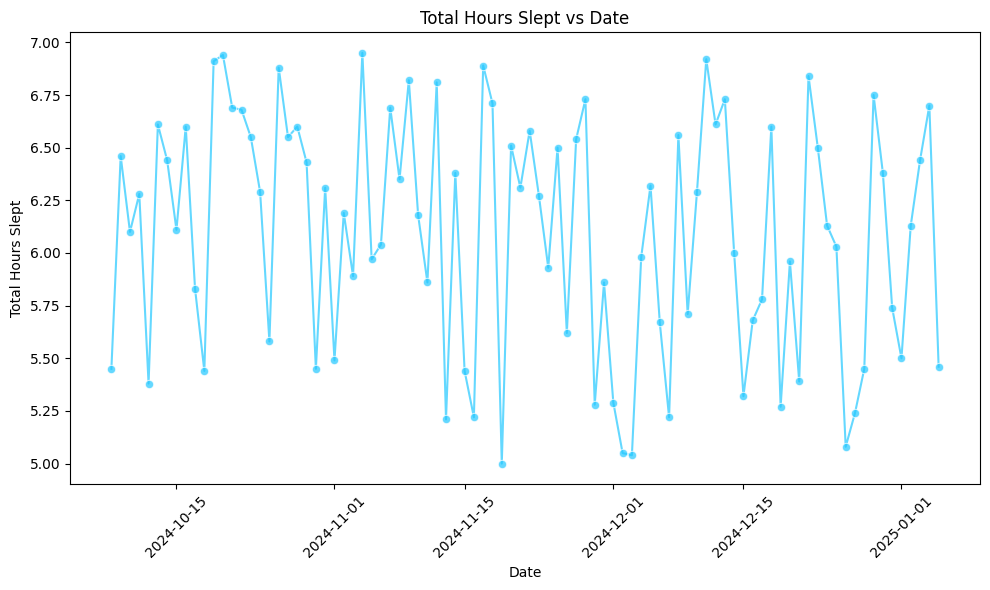

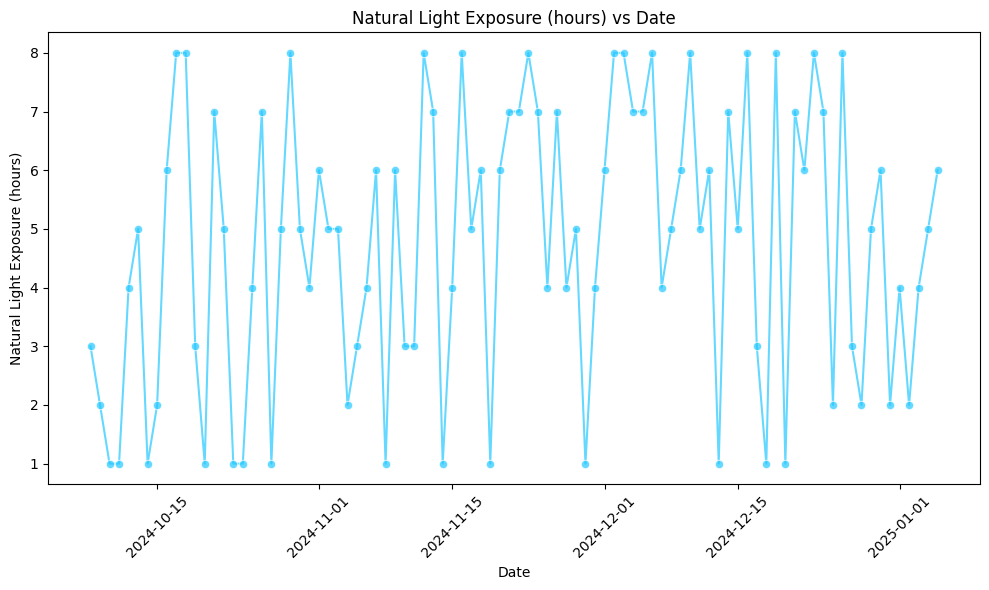

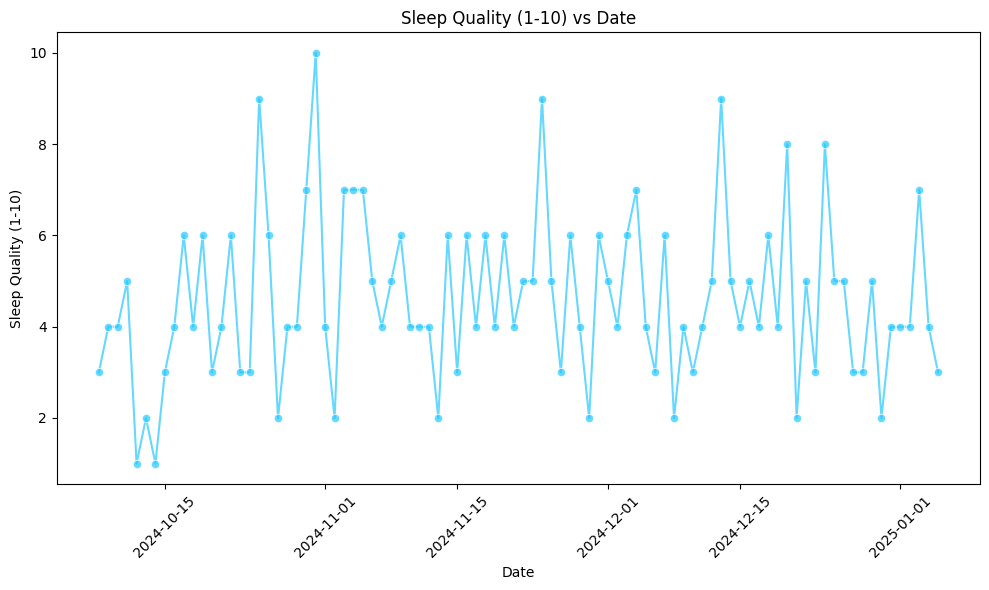

In [ ]:
def plot_columns_against_date(df):
    columns_to_plot = [
        'Screen Time (minutes)', 'Stress Level (1-10)', 'Daily Calorie Intake (kcal)',
        'Smoking (cigarettes)', 'Physical Activity (minutes)', 'Eating Habits',
        'Caffeine Consumption (mg)', 'Bedtime', 'Wake-up Time',
        'Total Hours Slept', 'Natural Light Exposure (hours)', 'Pre-Sleep Activities',
        'Sleep Quality (1-10)'
    ]

    # Convert 'Date' to datetime if it's not already
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    for column in columns_to_plot:
        # Only plot if the column exists and is numeric
        if column in df.columns and df[column].dtype in ['int64', 'float64']:
            plt.figure(figsize=(10, 6))
            sns.lineplot(x='Date', y=column, data=df, marker='o', color='#23C8FF', alpha=0.7)
            plt.title(f'{column} vs Date')
            plt.xlabel('Date')
            plt.ylabel(column)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.savefig(f'line_{column.replace(" ", "_").lower()}_vs_date.png', dpi=300)
            plt.show()
            plt.close()

# Example usage
plot_columns_against_date(df)


## Analysis completed
Use the visualizations and results to draw insights for your report.